<a href="https://colab.research.google.com/github/Makrufkasr/Utilizing_Customer_Data_to_Supporting_Development_of_Better_Marketing_Strategy/blob/main/Clustering_using_RFM_and_Cluster_Segmentation_clear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Utilizing Customer Data to Supporting Development of Better Marketing Strategy**
## 1. Background/Experts Problems 
The experts acknowledged that the current marketing used by Ecommerceu is the same across different segments. The treatment is the same all users. However, the experts believe that they're missing an opportunity to maximize their customer. Their experts would like to conduct differnet apporaches in different segments using segmentation analysis.The expert would like to know the characteristics and thei utillize their behaviour to **Improve the marketing performance and increases the transactions**

## Dataset yang digunakan

*   Transactions

    Digunakan untuk mengetahui behaviour harian user yang berkaitan dengan transactions.
    https://docs.google.com/spreadsheets/d/1p4_hA-6j16EFIo6257LD2Un0OJZk9KCaedc7HdQcaUc/edit#gid=2130552848

*   User

    Digunakan untuk mengethaui data dri user tersebut location atau nama user tersebut. 
    https://docs.google.com/spreadsheets/d/1p4_hA-6j16EFIo6257LD2Un0OJZk9KCaedc7HdQcaUc/edit#gid=2130552848


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from datetime import datetime
from datetime import timedelta
import matplotlib.cm as cm   
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler  
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# import transactions dataset
trans = pd.read_csv('https://docs.google.com/spreadsheets/d/1Se8UP7QFecVm0O0aia3rXQ_shusZMktXRkbxNcr-ZgI/export?format=csv&gid=539493170')
trans_dc = trans.copy()
trans_dc.head()

,transactions_id,sessions_id,payment_method_id,total_amount,transactions_timestamps,status,voucher_id
0,6261,61939,1,935000,2021-05-05 04:16:02 UTC,canceled,1
1,11484,115377,1,60000,2022-01-02 08:33:16 UTC,canceled,1
2,17261,166707,1,3205000,2022-10-20 13:55:19 UTC,canceled,1
3,10978,110160,1,2850000,2021-12-18 11:23:49 UTC,canceled,1
4,12166,122462,1,55000,2022-02-04 06:24:09 UTC,canceled,1


In [ ]:
#Transform data type from datetime to date
trans_dc['transactions_timestamps'] = pd.to_datetime(trans_dc['transactions_timestamps'])
trans_dc['transactions_timestamps'] = trans_dc['transactions_timestamps'].dt.date
print(trans_dc['transactions_timestamps'].dtype)

object


In [ ]:
#Checking in dataframe
trans_dc.head()

,transactions_id,sessions_id,payment_method_id,total_amount,transactions_timestamps,status,voucher_id
0,6261,61939,1,935000,2021-05-05,canceled,1
1,11484,115377,1,60000,2022-01-02,canceled,1
2,17261,166707,1,3205000,2022-10-20,canceled,1
3,10978,110160,1,2850000,2021-12-18,canceled,1
4,12166,122462,1,55000,2022-02-04,canceled,1


In [ ]:
#import sessions dataset for get user_id
session = pd.read_csv('https://docs.google.com/spreadsheets/d/1XEbfWmYw8yzilT7mY-GKPg_Q8atsRIVz8ThHgZGUujg/export?format=csv&gid=1140501365')
sessions_dc = session.copy()
session_dc = session.copy()
session_dc['visits_timestamps'] = pd.to_datetime(session_dc['visits_timestamps'])
session_dc['visits_timestamps'] = session_dc['visits_timestamps'].dt.date
print(session_dc['visits_timestamps'].dtype)
session_dc.head()

object


,sessions_id,user_id,traffic_medium,visits_timestamps,traffic_source,traffic_name
0,14,14,Direct,2019-12-01,Direct,NaN
1,20,20,Direct,2019-12-01,Direct,NaN
2,70,63,Direct,2019-12-04,Direct,NaN
3,71,64,Direct,2019-12-04,Direct,NaN
4,72,65,Direct,2019-12-04,Direct,NaN


In [ ]:
session_dc_us = session_dc.groupby(['user_id']).max()['visits_timestamps'].reset_index(name="last_visit")
session_dc_us.head(20)

<ipython-input-93-bb161b5de18c>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  session_dc_us = session_dc.groupby(['user_id']).max()['visits_timestamps'].reset_index(name="last_visit")


,user_id,last_visit
0,1,2022-12-30
1,2,2022-12-11
2,3,2022-11-13
3,4,2022-12-30
4,5,2022-11-30
5,6,2022-11-04
6,7,2022-12-29
7,8,2022-09-24
8,9,2022-12-25
9,10,2022-12-10


In [ ]:
merge_sessions = session_dc.merge(session_dc_us, how ='left', on='user_id')
merge_sessions.head()

,sessions_id,user_id,traffic_medium,visits_timestamps,traffic_source,traffic_name,last_visit
0,14,14,Direct,2019-12-01,Direct,NaN,2022-12-10
1,20,20,Direct,2019-12-01,Direct,NaN,2022-12-26
2,70,63,Direct,2019-12-04,Direct,NaN,2022-11-11
3,71,64,Direct,2019-12-04,Direct,NaN,2022-12-24
4,72,65,Direct,2019-12-04,Direct,NaN,2022-10-11


In [ ]:
# Import dataset voucher
voucher = pd.read_csv('https://docs.google.com/spreadsheets/d/1LWSSHJhAzNJzq321QMfkP9uTbzL5FCZrdJLxrnd6h3Q/export?format=csv&gid=382044507')
voucher_dc = voucher.copy()
voucher_dc.head()

,voucher,voucher_id
0,Cashback,1
1,Delivery Fee Discounts,2
2,Direct Discount,3
3,No Discounts,4


In [ ]:
# Import dataset payment method
payment_method = pd.read_csv('https://docs.google.com/spreadsheets/d/1Dd2yj69Tt8jGYO9z4B8iQDbfUny6DzzsDBv2t6gxwic/export?format=csv&gid=450039772')
payment_dc = payment_method.copy()
payment_dc.head()

,payment_method,payment_method_id
0,Biller Services,1
1,Credit Card,2
2,Debit,3
3,E-Wallet,4
4,Paylater,5


In [ ]:
df_merge = trans_dc.merge(merge_sessions, how='left', left_on=['sessions_id'], right_on=['sessions_id'])
df_merge1 = df_merge.merge(voucher_dc, how='left', left_on=['voucher_id'], right_on=['voucher_id'])
df_merge2 = df_merge1.merge(payment_dc, how='left', on='payment_method_id')
df_merge2.head()

,transactions_id,sessions_id,payment_method_id,total_amount,transactions_timestamps,status,voucher_id,user_id,traffic_medium,visits_timestamps,traffic_source,traffic_name,last_visit,voucher,payment_method
0,6261,61939,1,935000,2021-05-05,canceled,1,3954,Direct,2021-05-05,Direct,NaN,2022-11-12,Cashback,Biller Services
1,11484,115377,1,60000,2022-01-02,canceled,1,4738,NaN,2022-01-02,NaN,google search,2022-12-01,Cashback,Biller Services
2,17261,166707,1,3205000,2022-10-20,canceled,1,8594,Email,2022-10-20,Newsletter,NaN,2022-12-25,Cashback,Biller Services
3,10978,110160,1,2850000,2021-12-18,canceled,1,5747,Direct,2021-12-18,Direct,NaN,2022-12-31,Cashback,Biller Services
4,12166,122462,1,55000,2022-02-04,canceled,1,6547,Direct,2022-02-04,Direct,NaN,2022-12-30,Cashback,Biller Services


In [ ]:
table_rfm_2022 = df_merge2.copy()
table_rfm_2022.head()

,transactions_id,sessions_id,payment_method_id,total_amount,transactions_timestamps,status,voucher_id,user_id,traffic_medium,visits_timestamps,traffic_source,traffic_name,last_visit,voucher,payment_method
0,6261,61939,1,935000,2021-05-05,canceled,1,3954,Direct,2021-05-05,Direct,NaN,2022-11-12,Cashback,Biller Services
1,11484,115377,1,60000,2022-01-02,canceled,1,4738,NaN,2022-01-02,NaN,google search,2022-12-01,Cashback,Biller Services
2,17261,166707,1,3205000,2022-10-20,canceled,1,8594,Email,2022-10-20,Newsletter,NaN,2022-12-25,Cashback,Biller Services
3,10978,110160,1,2850000,2021-12-18,canceled,1,5747,Direct,2021-12-18,Direct,NaN,2022-12-31,Cashback,Biller Services
4,12166,122462,1,55000,2022-02-04,canceled,1,6547,Direct,2022-02-04,Direct,NaN,2022-12-30,Cashback,Biller Services


In [ ]:
table_rfm_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19173 entries, 0 to 19172
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transactions_id          19173 non-null  int64 
 1   sessions_id              19173 non-null  int64 
 2   payment_method_id        19173 non-null  int64 
 3   total_amount             19173 non-null  int64 
 4   transactions_timestamps  19173 non-null  object
 5   status                   19173 non-null  object
 6   voucher_id               19173 non-null  int64 
 7   user_id                  19173 non-null  int64 
 8   traffic_medium           15183 non-null  object
 9   visits_timestamps        19173 non-null  object
 10  traffic_source           17133 non-null  object
 11  traffic_name             4564 non-null   object
 12  last_visit               19173 non-null  object
 13  voucher                  19173 non-null  object
 14  payment_method           19173 non-nul

In [ ]:
table_rfm = table_rfm_2022.loc[:,['user_id','transactions_id','last_visit','total_amount']]
print(table_rfm.shape)
table_rfm.head()

(19173, 4)


,user_id,transactions_id,last_visit,total_amount
0,3954,6261,2022-11-12,935000
1,4738,11484,2022-12-01,60000
2,8594,17261,2022-12-25,3205000
3,5747,10978,2022-12-31,2850000
4,6547,12166,2022-12-30,55000


In [ ]:
# #filter date from year 2021 - 2022

# start_date = pd.to_datetime('2021-01-01')
# end_date = pd.to_datetime('2022-01-31')
# filter = (table_rfm['transactions_timestamps'] >= start_date) & (table_rfm['transactions_timestamps'] <= end_date)
# table_rfm_2022 = table_rfm.loc[filter]
# print(table_rfm_2022.shape)
# table_rfm_2022.head()

In [ ]:
table_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19173 entries, 0 to 19172
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          19173 non-null  int64 
 1   transactions_id  19173 non-null  int64 
 2   last_visit       19173 non-null  object
 3   total_amount     19173 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 748.9+ KB


In [ ]:
#Total user 
table_rfm['user_id'].nunique()

7963

In [ ]:
table_rfm['last_visit']= pd.to_datetime(table_rfm['last_visit'])

#Create Data Frame RFM

In [ ]:
#Setting last date transactions
now = pd.to_datetime('2022-12-31') # Last activity 

In [ ]:
# Create RFM table 
table_rfm= table_rfm.groupby('user_id').agg({'last_visit' : lambda day : (now - day.max()).days,
                               'transactions_id': lambda num : len(num),
                              'total_amount': lambda price : price.sum()
                             
                             
                             })
col_list = ['Recency','Frequency','Monetary']
table_rfm.columns = col_list
table_rfm = table_rfm.reset_index()
rfm_for_k = table_rfm.copy()
rfm_for_k.head(20)

,user_id,Recency,Frequency,Monetary
0,1,1,1,135000
1,2,20,8,9195000
2,3,48,1,110000
3,4,1,1,135000
4,5,31,5,4405000
5,6,57,7,13160000
6,7,2,1,235000
7,8,98,3,4580000
8,9,6,1,75000
9,10,21,6,14000000


Things can be analyzed :

* Recency
* Frequency
* Monetary
* Voucher type
* Traffic source
* Payment method


Download File to Excel

In [ ]:
# output_file = 'output.xlsx'
# profile.to_excel(output_file, index=False)

# print('Table downloaded successfully to', output_file)

In [ ]:
rfm_for_k.head()

,user_id,Recency,Frequency,Monetary
0,1,1,1,135000
1,2,20,8,9195000
2,3,48,1,110000
3,4,1,1,135000
4,5,31,5,4405000


In [ ]:
# Define Standard Scale dataset
ss_scale_df = rfm_for_k.copy()
column = ['Recency','Frequency','Monetary']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])
ss_scale_df.head(20)

,user_id,Recency,Frequency,Monetary
0,1,-0.668608,-0.779302,-0.904848
1,2,-0.441192,3.095728,1.808357
2,3,-0.106054,-0.779302,-0.912335
3,4,-0.668608,-0.779302,-0.904848
4,5,-0.309531,1.435000,0.373892
5,6,0.001668,2.542152,2.995758
6,7,-0.656638,-0.779302,-0.874901
7,8,0.492406,0.327849,0.426299
8,9,-0.608761,-0.779302,-0.922816
9,10,-0.429223,1.988576,3.247313


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

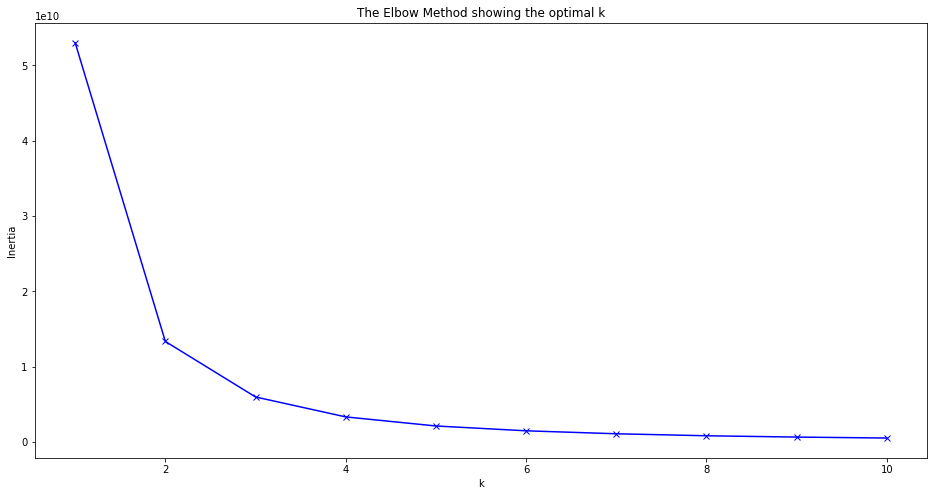

[53025075643.41013, 13366515584.747929, 5995522286.5570755, 3349541138.749553, 2145486342.6754532, 1504133460.631842, 1110363153.254333, 845643473.9471886, 671534692.1652942, 544437052.8120725]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5379782310215006


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5918509550828323


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4988648976233896


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.48423795171580264


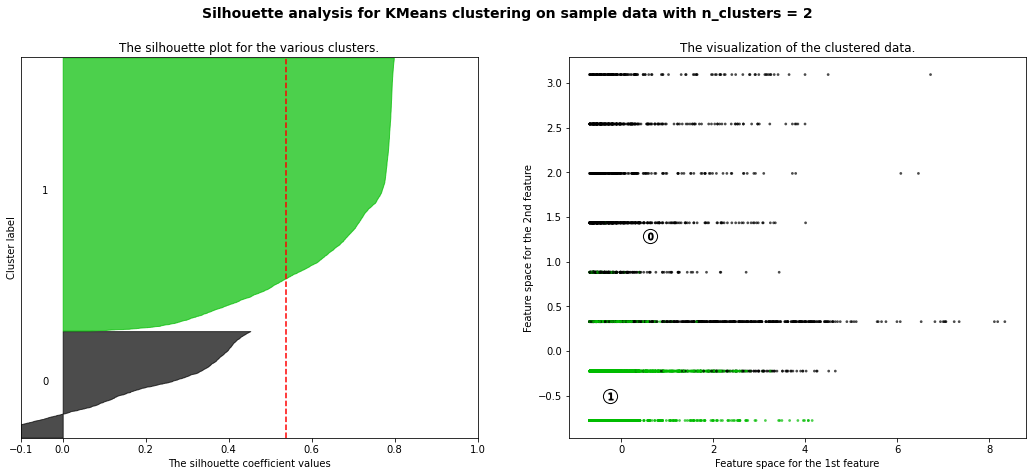

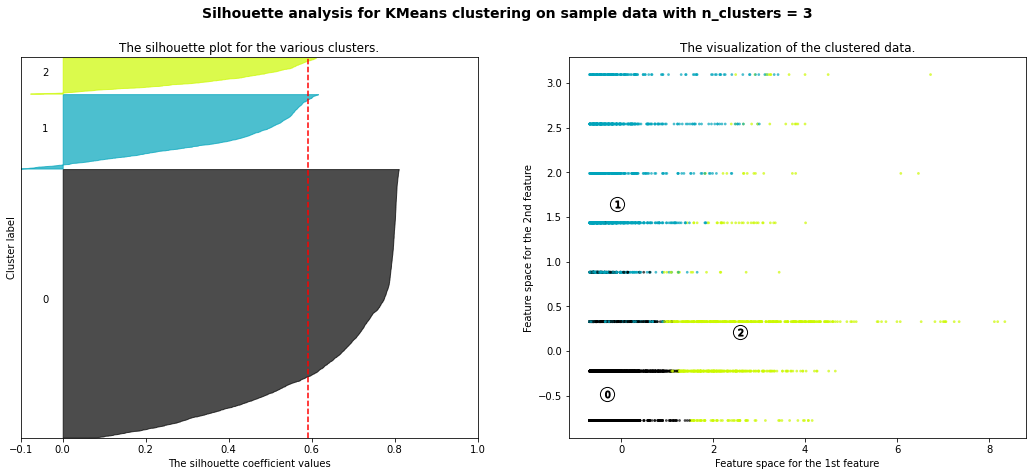

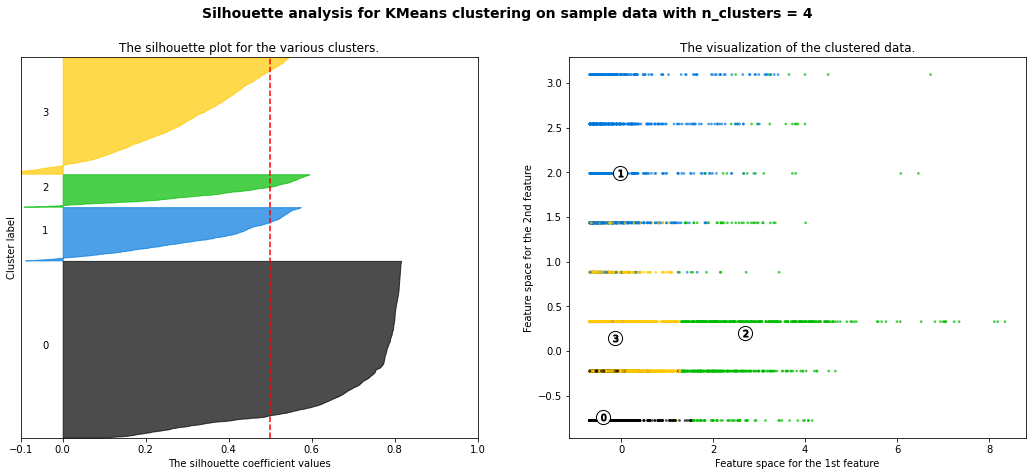

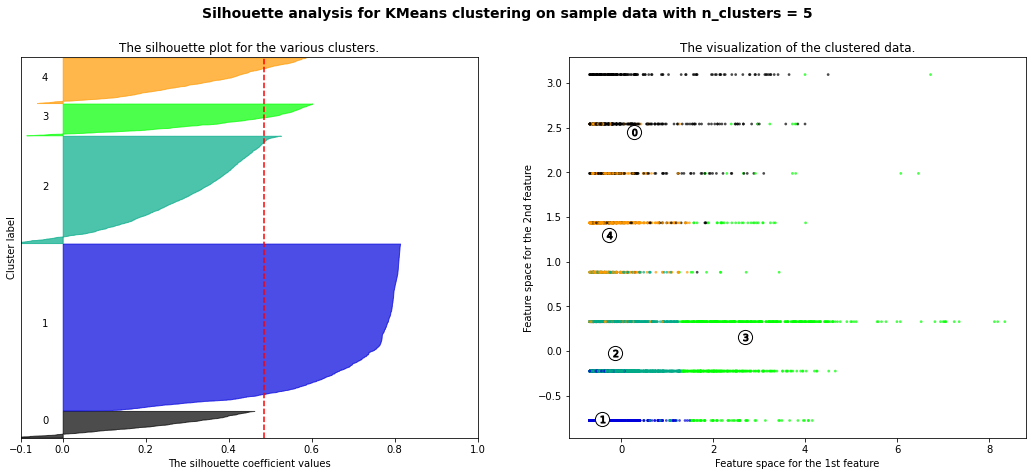

In [ ]:
# Create Silhoutte Analysis
silhoutte_analysis(ss_scale_df[['Recency','Frequency','Monetary']],list(range(2,6)))

In [ ]:
Cluster_4 = ss_scale_df.copy()
# Insert label cluster to RFM table
cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_4[['Recency','Frequency','Monetary']])
rfm_for_k['cluster'] = cluster_model.labels_
rfm_for_k.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,Recency,Frequency,Monetary,cluster
0,1,1,1,135000,0
1,2,20,8,9195000,3
2,3,48,1,110000,0
3,4,1,1,135000,0
4,5,31,5,4405000,1


In [ ]:
# profilling cluster by RFM
rfm_for_k.groupby(['cluster']).mean()

,user_id,Recency,Frequency,Monetary
cluster,,,,
0,4769.802741,23.706262,1.076861,5.622897e+05
1,4865.508614,45.232568,2.680886,4.016870e+06
2,3145.960469,282.729136,2.777452,4.094078e+06
3,2672.090098,54.584300,6.006244,9.325129e+06


In [ ]:
# Total Customer by cluster
rfm_for_k.groupby(['cluster'])['user_id'].count()

cluster
0     683
1    2442
2    1122
3    3716
Name: user_id, dtype: int64

In [ ]:
#Master file with cluster each user_id
Clean_seg1 = rfm_for_k.loc[:,['user_id','cluster','Recency','Frequency','Monetary']]
Cust_seg1 = table_rfm_2022.merge(Clean_seg1, how='left', on=['user_id'])
Cust_seg1.head()

,transactions_id,sessions_id,payment_method_id,total_amount,transactions_timestamps,status,voucher_id,user_id,traffic_medium,visits_timestamps,traffic_source,traffic_name,last_visit,voucher,payment_method,cluster,Recency,Frequency,Monetary
0,6261,61939,1,935000,2021-05-05,canceled,1,3954,Direct,2021-05-05,Direct,NaN,2022-11-12,Cashback,Biller Services,1,49,4,7305000
1,11484,115377,1,60000,2022-01-02,canceled,1,4738,NaN,2022-01-02,NaN,google search,2022-12-01,Cashback,Biller Services,3,30,1,60000
2,17261,166707,1,3205000,2022-10-20,canceled,1,8594,Email,2022-10-20,Newsletter,NaN,2022-12-25,Cashback,Biller Services,1,6,2,4045000
3,10978,110160,1,2850000,2021-12-18,canceled,1,5747,Direct,2021-12-18,Direct,NaN,2022-12-31,Cashback,Biller Services,1,0,2,4500000
4,12166,122462,1,55000,2022-02-04,canceled,1,6547,Direct,2022-02-04,Direct,NaN,2022-12-30,Cashback,Biller Services,3,1,1,55000


In [ ]:
Cluster = rfm_for_k.loc[:,['user_id','cluster']]
Cluster_fix = sessions_dc.merge(Cluster, how='left', on=['user_id'])
Cluster_fix.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 190973 entries, 0 to 190972
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sessions_id        190973 non-null  int64  
 1   user_id            190973 non-null  int64  
 2   traffic_medium     138856 non-null  object 
 3   visits_timestamps  190973 non-null  object 
 4   traffic_source     153538 non-null  object 
 5   traffic_name       95363 non-null   object 
 6   cluster            165839 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 11.7+ MB


In [ ]:
output_file = 'ClusterFix.csv'
Cluster_fix.to_csv(output_file, index=False)

print('Table downloaded successfully to', output_file)

Table downloaded successfully to ClusterFix.csv


In [ ]:
output_file = 'Segmentation2.csv'
Cust_seg1.to_csv(output_file, index=False)

print('Table downloaded successfully to', output_file)

Table downloaded successfully to Segmentation2.csv


In [ ]:
Cust_seg1.groupby(['cluster','voucher']).nunique()['user_id'].reset_index(name= "counts")

,cluster,voucher,counts
0,0,Cashback,278
1,0,Delivery Fee Discounts,455
2,0,Direct Discount,282
3,0,No Discounts,378
4,1,Cashback,1054
5,1,Delivery Fee Discounts,1424
6,1,Direct Discount,1013
7,1,No Discounts,1362
8,2,Cashback,919
9,2,Delivery Fee Discounts,288


In [ ]:
Cust_seg1.groupby(['cluster','payment_method']).nunique()['user_id'].reset_index(name= "counts")

,cluster,payment_method,counts
0,0,Biller Services,94
1,0,Credit Card,280
2,0,Debit,253
3,0,E-Wallet,240
4,0,Paylater,227
5,0,Virtual Account,398
6,1,Biller Services,311
7,1,Credit Card,1035
8,1,Debit,1013
9,1,E-Wallet,908


In [ ]:
Cust_seg1.groupby(['cluster','traffic_source']).nunique()['user_id'].reset_index(name= "counts")

,cluster,traffic_source,counts
0,0,Direct,363
1,0,Facebook,174
2,0,Google,315
3,0,Instagram,167
4,0,Newsletter,326
5,1,Direct,1343
6,1,Facebook,638
7,1,Google,1095
8,1,Instagram,607
9,1,Newsletter,1087


#Profilling Segmentation

**Silver** = Recency 300 Hari, Pembelian 1.17 (terbanyak ke 3), Monetary terbanyak ke 3, Delivery disc, no disc, direct disc.. Payment method = VA, paylater, Debit Total Populasi 26,7%

**Bronze** = Recency 77 Hari, Pembelian 1.0 (Terbanyak ke 4), Monetary terbanyak ke 4.
Delv, Direc, Ccashback.. Payment Method = VA, paylater dan billing service, Populasi = 37,1%

**Diamond** = Recencny 89 Hari, Pembelian 3 (Terbanyak 1), Monetary terbanyak ke 1, Jenis Voucher No discount,cashback, Direct discount. Payment Method = VA, Debit dan E-wallet, Populasi = 10,5%

**Gold** = Recency 85 Hari, Pembelian sebanyak 2,1(Terbanyak ke 2). Monetary terbanyak ke 2 , Jenis Voucher = No disc. delivery, Cashback. Payment Method = VA, Debit dan Credit Card

-- Voucher Usage each cluster
Visualisasi - Clustering ti conve

